In [1]:
#==========================================
# Department of Economics - UFPE
# Prof. Marcelo Eduardo Alves da Silva
# Matlab code to simulate Mundel Fleming model
# November 2021
#=========================================
# Matlab to python by Paulo

In [2]:
#Ajuste gráfico
def jupter_settings(): 
  %matplotlib inline 
  %pylab inline
  plt.style.use('ggplot') 
  plt.rcParams['figure.figsize'] = [20,8] 
  plt.rcParams['font.size'] = 24
  #plt.rcParams['font.family']='serif'
  plt.rcParams['font.serif']='Ubuntu'
  plt.rcParams['font.monospace']='Ubuntu Mono'
  plt.rcParams['font.size']=12
  plt.rcParams['axes.labelsize']=14
  plt.rcParams['axes.labelweight']='bold'
  plt.rcParams['axes.titlesize']=15
  plt.rcParams['xtick.labelsize']=10
  plt.rcParams['ytick.labelsize']=10
  plt.rcParams['legend.fontsize']=12
  plt.rcParams['figure.titlesize']=15
  plt.rcParams['figure.subplot.left'] = 0.125
  plt.rcParams['figure.subplot.bottom'] = 0.125
  plt.rcParams['figure.subplot.right'] = 0.9
  plt.rcParams['figure.subplot.top'] = 0.9
  plt.rcParams['figure.subplot.wspace'] = 0.2
  plt.rcParams['figure.subplot.hspace'] = 0.35
  #plt.figure(figsize=(10,10))
  
  #display(html('<style>.container{width:80% !important};</style>'))
  #pd.options.display.max_columns=None
  #pd.options.display.max_rows=None
  #pd.set_option('display.expand_frame_repr', False)

  #sns.set_style('ticks')
jupter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Tamanho da simulacao
n=50
time = np.arange(1,n,1)

In [5]:
#########################################################
# Simulacao I
#########################################################

In [28]:
#Valores iniciais das variaveis. Assumindo que estao no Steady-State
y = np.zeros((n,1))
c = np.zeros((n,1))
I = np.zeros((n,1))
x = np.zeros((n,1))
im = np.zeros((n,1))
m = np.zeros((n,1))
e = ((1+0.025)/(1 + 0.05))*np.ones((n,1))

In [29]:
#Variaveis exogenas
T=100*np.ones((n,1))
r = 0.05*np.ones((n,1))
y_f = 10000*np.ones((n,1))
r_us = 0.025*np.ones((n,1))
g = T #Restricao orcamentaria do governo

In [30]:
for i in range(2,n,1):
  y_f[i] = y_f[i]
  r[i] = r[i]
  e[i] = (1+r_us[i])/(1+r[i])
  y[i] = (1/(1-0.5-0.2+0.1))*(200 + 0.5*T[i] + 400 - 200*r[i] + 200 + 0.01*y_f[i] + 100*e[i] + 50*e[i])
  c[i] = 200 + 0.5*(y[i] - T[i])
  I[i] = 400 + 0.2*y[i] - 2000*r[i]
  x[i] = 200 + 0.01*y_f[i] + 100*e[i]
  im[i] = 0.1*y[i] - 50*e[i]
  m[i] = y[i] - 0.02*r[i]

In [31]:
time = np.arange(11,n,1)
e=e[11:]
y = y[11:]
c=c[11:]
I=I[11:]
x=x[11:]
im=im[11:]
m=m[11:]
y_f = y_f[11:]
r = r[11:]
r_us = r_us[11:]

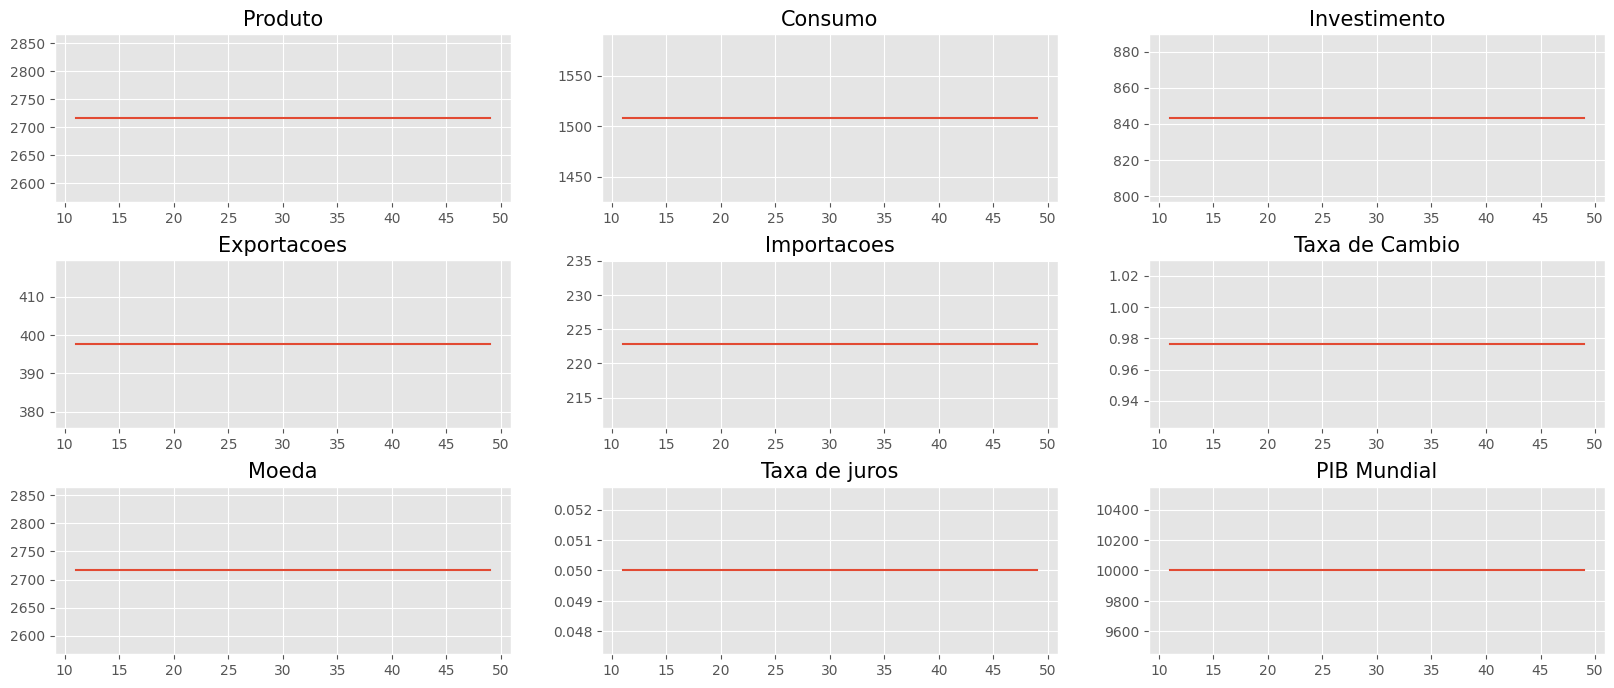

In [32]:
#Plotando gráfico
#figure(1);

plt.subplot(3,3,1)
plt.plot(time, y)
plt.title('Produto')
plt.xlabel='Tempo'

plt.subplot(3,3,2)
plt.plot(time, c)
plt.title('Consumo')
plt.xlabel='Tempo'

plt.subplot(3,3,3)
plt.plot(time, I)
plt.title('Investimento')
plt.xlabel='Tempo'


plt.subplot(3,3,4)
plt.plot(time, x)
plt.title('Exportacoes')
plt.xlabel='Tempo'

plt.subplot(3,3,5)
plt.plot(time, im)
plt.title('Importacoes')
plt.xlabel='Tempo'

plt.subplot(3,3,6)
plt.plot(time, e)
plt.title('Taxa de Cambio')
plt.xlabel='Tempo'

plt.subplot(3,3,7)
plt.plot(time, m)
plt.title('Moeda')
plt.xlabel='Tempo'

plt.subplot(3,3,8)
plt.plot(time, r)
plt.title('Taxa de juros')
plt.xlabel='Tempo'

plt.subplot(3,3,9)
plt.plot(time, y_f)
plt.title('PIB Mundial')
plt.xlabel='Tempo'

In [12]:
########################################################
# Simulacao II: Aumento em R - Deterministico
########################################################

In [13]:
#Valores iniciais das variaveis. Assumindo que estao no Steady-State
y1 = np.zeros((n,1))
c1 = np.zeros((n,1))
I1 = np.zeros((n,1))
x1 = np.zeros((n,1))
im1 = np.zeros((n,1))
e1 = ((1+0.025)/(1 + 0.05))*np.ones((n,1))
m1 = np.zeros((n,1))

In [14]:
#Variaveis exogenas
T1=100*np.ones((n,1))
y_f1 = 10000*np.ones((n,1))
r_us1 = 0.025*np.ones((n,1))
r1=0.05*np.ones((n,1))
g1 = T1 #Restricao orcamentaria do governo

In [15]:
#Aumento Temporario em r apenas no periodo t=15
r1[15] = 0.1

In [16]:
#Simulacao
for i in range(2,n,1):
  e1[i] = (1+r_us1[i])/(1+r1[i])
  y1[i] = (1/(1-0.5-0.2+0.1))*(200 + 0.5*T1[i] + 400 - 200*r1[i] + 200 + 0.01*y_f1[i] + 100*e1[i] + 50*e1[i])
  c1[i] = 200 + 0.5*(y1[i] - T1[i])
  I1[i] = 400 + 0.2*y1[i] - 2000*r1[i]
  x1[i] = 200 + 0.01*y_f1[i] + 100*e1[i]
  im1[i] = 0.1*y1[i] - 50*e1[i]
  m1[i] = y1[i] - 0.02*r1[i]

In [17]:
time = np.arange(11,n,1)
e1=e1[11:]
y1 = y1[11:]
c1=c1[11:]
I1=I1[11:]
x1=x1[11:]
m1=m1[11:]
im1=im1[11:]
y_f1 = y_f1[11:]
r1 = r1[11:]

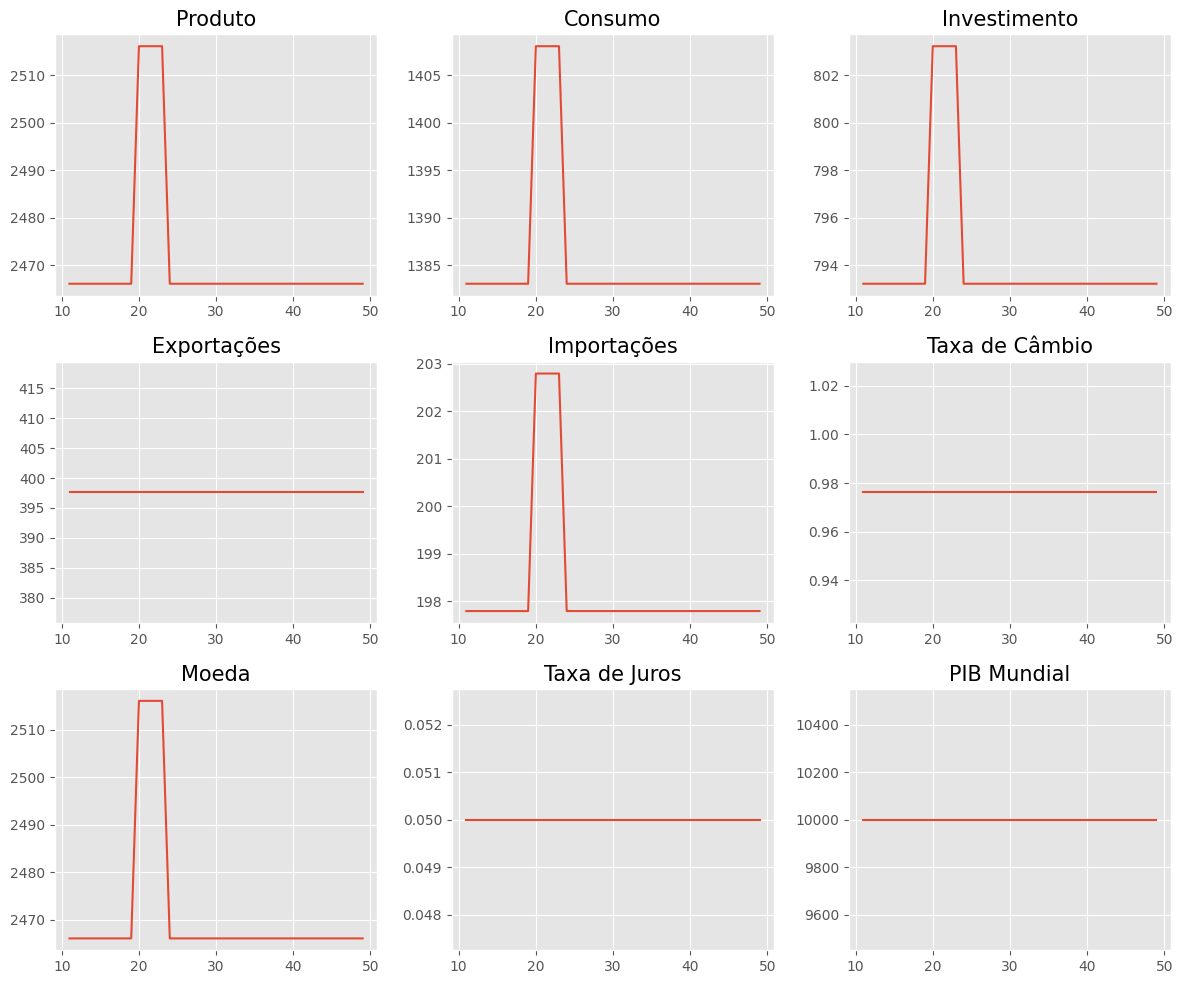

In [34]:
# -------------------------
# Simulação II: Política Fiscal Expansionista (∆g = +20%)
# -------------------------

# Valores iniciais no steady state
y2 = np.zeros((n,1))
c2 = np.zeros((n,1))
I2 = np.zeros((n,1))
x2 = np.zeros((n,1))
im2 = np.zeros((n,1))
e2 = ((1+0.025)/(1 + 0.05))*np.ones((n,1))
m2 = np.zeros((n,1))

# Variáveis exógenas
T2 = 100*np.ones((n,1))
y_f2 = 10000*np.ones((n,1))
r_us2 = 0.025*np.ones((n,1))
r2 = 0.05*np.ones((n,1))

# Política fiscal inicial (igual à restrição orçamentária)
g2 = T2.copy()

# Aumento temporário de 20% no gasto público a partir do período 20
g2[20:24] = g2[20:24] * 1.2

# Simulação
for i in range(2, n, 1):
    e2[i] = (1 + r_us2[i]) / (1 + r2[i])
    y2[i] = (1/(1 - 0.5 - 0.2 + 0.1)) * (
        200 + 0.5*T2[i] + 400 - 200*r2[i] + g2[i] +
        0.01*y_f2[i] + 100*e2[i] + 50*e2[i]
    )
    c2[i] = 200 + 0.5*(y2[i] - T2[i])
    I2[i] = 400 + 0.2*y2[i] - 2000*r2[i]
    x2[i] = 200 + 0.01*y_f2[i] + 100*e2[i]
    im2[i] = 0.1*y2[i] - 50*e2[i]
    m2[i] = y2[i] - 0.02*r2[i]

# Cortando os primeiros períodos para estabilidade
time = np.arange(11, n, 1)
e2 = e2[11:]
y2 = y2[11:]
c2 = c2[11:]
I2 = I2[11:]
x2 = x2[11:]
m2 = m2[11:]
im2 = im2[11:]
y_f2 = y_f2[11:]
r2 = r2[11:]

# -------------------------
# Gráficos
# -------------------------
plt.figure(figsize=(12, 10))

plt.subplot(3,3,1)
plt.plot(time, y2)
plt.title('Produto')

plt.subplot(3,3,2)
plt.plot(time, c2)
plt.title('Consumo')

plt.subplot(3,3,3)
plt.plot(time, I2)
plt.title('Investimento')

plt.subplot(3,3,4)
plt.plot(time, x2)
plt.title('Exportações')

plt.subplot(3,3,5)
plt.plot(time, im2)
plt.title('Importações')

plt.subplot(3,3,6)
plt.plot(time, e2)
plt.title('Taxa de Câmbio')

plt.subplot(3,3,7)
plt.plot(time, m2)
plt.title('Moeda')

plt.subplot(3,3,8)
plt.plot(time, r2)
plt.title('Taxa de Juros')

plt.subplot(3,3,9)
plt.plot(time, y_f2)
plt.title('PIB Mundial')

plt.tight_layout()
plt.show()


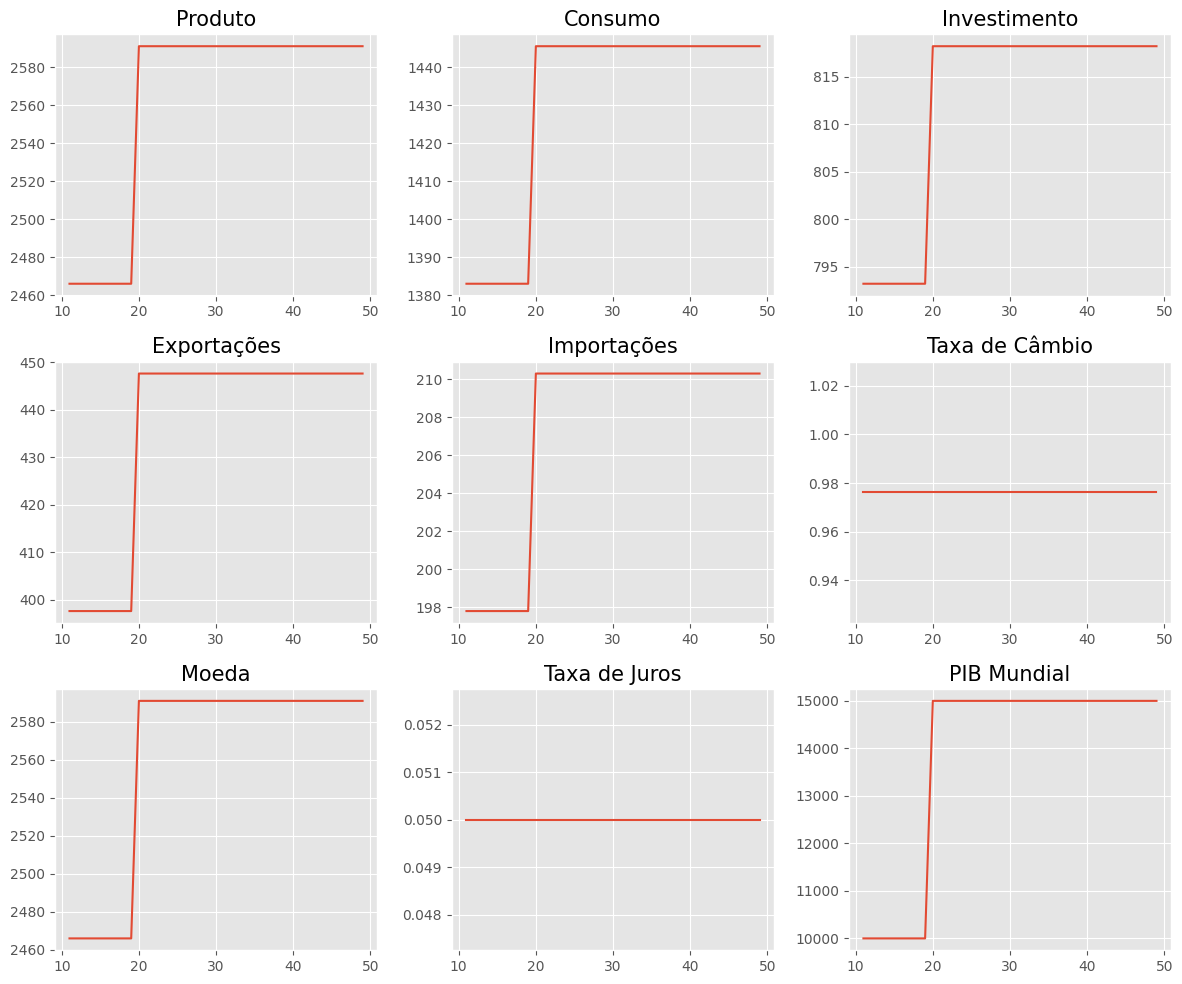

In [35]:
# -------------------------
# Simulação III: Aumento no PIB Mundial (+50% a partir do período 20)
# -------------------------

# Valores iniciais no steady state
y3 = np.zeros((n,1))
c3 = np.zeros((n,1))
I3 = np.zeros((n,1))
x3 = np.zeros((n,1))
im3 = np.zeros((n,1))
e3 = ((1+0.025)/(1 + 0.05))*np.ones((n,1))
m3 = np.zeros((n,1))

# Variáveis exógenas
T3 = 100*np.ones((n,1))
y_f3 = 10000*np.ones((n,1))  # PIB mundial inicial
r_us3 = 0.025*np.ones((n,1))
r3 = 0.05*np.ones((n,1))
g3 = T3.copy()

# Aumento de 50% no PIB mundial a partir do período 20
y_f3[20:] = y_f3[20:] * 1.5

# Simulação
for i in range(2, n, 1):
    e3[i] = (1 + r_us3[i]) / (1 + r3[i])
    y3[i] = (1/(1 - 0.5 - 0.2 + 0.1)) * (
        200 + 0.5*T3[i] + 400 - 200*r3[i] + g3[i] +
        0.01*y_f3[i] + 100*e3[i] + 50*e3[i]
    )
    c3[i] = 200 + 0.5*(y3[i] - T3[i])
    I3[i] = 400 + 0.2*y3[i] - 2000*r3[i]
    x3[i] = 200 + 0.01*y_f3[i] + 100*e3[i]
    im3[i] = 0.1*y3[i] - 50*e3[i]
    m3[i] = y3[i] - 0.02*r3[i]

# Cortando os primeiros períodos para estabilidade
time = np.arange(11, n, 1)
e3 = e3[11:]
y3 = y3[11:]
c3 = c3[11:]
I3 = I3[11:]
x3 = x3[11:]
m3 = m3[11:]
im3 = im3[11:]
y_f3 = y_f3[11:]
r3 = r3[11:]

# -------------------------
# Gráficos
# -------------------------
plt.figure(figsize=(12, 10))

plt.subplot(3,3,1)
plt.plot(time, y3)
plt.title('Produto')

plt.subplot(3,3,2)
plt.plot(time, c3)
plt.title('Consumo')

plt.subplot(3,3,3)
plt.plot(time, I3)
plt.title('Investimento')

plt.subplot(3,3,4)
plt.plot(time, x3)
plt.title('Exportações')

plt.subplot(3,3,5)
plt.plot(time, im3)
plt.title('Importações')

plt.subplot(3,3,6)
plt.plot(time, e3)
plt.title('Taxa de Câmbio')

plt.subplot(3,3,7)
plt.plot(time, m3)
plt.title('Moeda')

plt.subplot(3,3,8)
plt.plot(time, r3)
plt.title('Taxa de Juros')

plt.subplot(3,3,9)
plt.plot(time, y_f3)
plt.title('PIB Mundial')

plt.tight_layout()
plt.show()


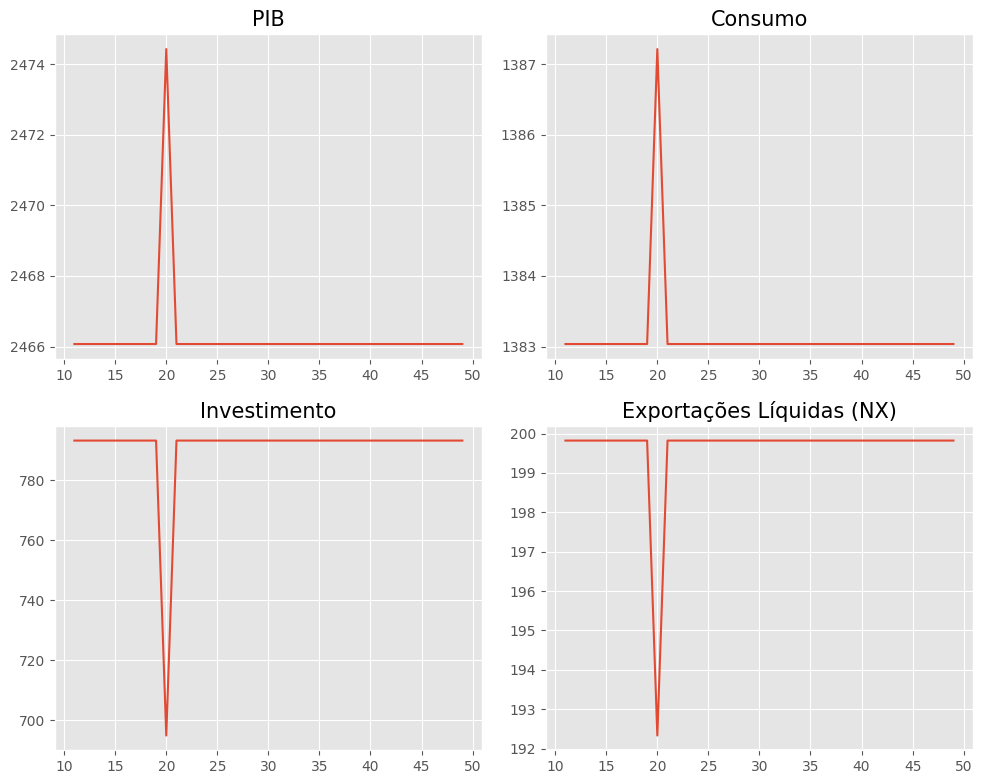

In [36]:
# -------------------------
# Simulação IV: Aumento da taxa de juros + aumento nos gastos do governo
# -------------------------

# Valores iniciais no steady state
y4 = np.zeros((n,1))
c4 = np.zeros((n,1))
I4 = np.zeros((n,1))
x4 = np.zeros((n,1))
im4 = np.zeros((n,1))
nx4 = np.zeros((n,1))  # Exportações líquidas
e4 = ((1+0.025)/(1 + 0.05))*np.ones((n,1))
m4 = np.zeros((n,1))

# Variáveis exógenas
T4 = 100*np.ones((n,1))
y_f4 = 10000*np.ones((n,1))
r_us4 = 0.025*np.ones((n,1))
r4 = 0.05*np.ones((n,1))   # Taxa de juros inicial
g4 = T4.copy()             # Gastos do governo

# Choques no período 20
r4[20] = 0.10               # Aumento da taxa de juros
g4[20] = g4[20] * 1.2       # Aumento de 20% nos gastos

# Simulação
for i in range(2, n, 1):
    e4[i] = (1 + r_us4[i]) / (1 + r4[i])
    y4[i] = (1/(1 - 0.5 - 0.2 + 0.1)) * (
        200 + 0.5*T4[i] + 400 - 200*r4[i] + g4[i] +
        0.01*y_f4[i] + 100*e4[i] + 50*e4[i]
    )
    c4[i] = 200 + 0.5*(y4[i] - T4[i])
    I4[i] = 400 + 0.2*y4[i] - 2000*r4[i]
    x4[i] = 200 + 0.01*y_f4[i] + 100*e4[i]
    im4[i] = 0.1*y4[i] - 50*e4[i]
    nx4[i] = x4[i] - im4[i]  # Exportações líquidas
    m4[i] = y4[i] - 0.02*r4[i]

# Cortando os primeiros períodos para estabilidade
time = np.arange(11, n, 1)
y4 = y4[11:]
c4 = c4[11:]
I4 = I4[11:]
nx4 = nx4[11:]
r4 = r4[11:]

# -------------------------
# Gráficos
# -------------------------
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(time, y4)
plt.title('PIB')

plt.subplot(2,2,2)
plt.plot(time, c4)
plt.title('Consumo')

plt.subplot(2,2,3)
plt.plot(time, I4)
plt.title('Investimento')

plt.subplot(2,2,4)
plt.plot(time, nx4)
plt.title('Exportações Líquidas (NX)')

plt.tight_layout()
plt.show()
